In [3]:
import sys
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sklearn.linear_model
import sklearn.tree
%matplotlib inline 

## Load in trial data and convert into feature dataframe

In [5]:
data = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/dumble_8020_df.csv',index_col=0)
data = data.drop('0_trialDuration',axis=1)
feature_names = data.columns.values[:-1]

In [6]:
data.loc[0,:]

,Previous_10_Left_Choice,Previous_10_Right_Choice,Previous_10_Left_Reward,Previous_10_Right_Reward,Streak,5_Port,5_Reward,5_ITI,5_trialDuration,4_Port,...,2_Port,2_Reward,2_ITI,2_trialDuration,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,Decision
0,10.0,0.0,8.0,0.0,-1.0,1.0,0.0,3.286,0.407,1.0,...,1.0,1.0,2.234,0.325,1.0,0.0,2.133,0.482,1.411,1.0
0,9.0,1.0,9.0,0.0,9.0,1.0,1.0,1.855,0.277,1.0,...,1.0,1.0,1.223,0.269,1.0,1.0,2.451,0.280,1.459,1.0
0,8.0,2.0,7.0,0.0,4.0,0.0,0.0,4.242,0.460,1.0,...,1.0,1.0,1.784,0.392,1.0,1.0,2.067,0.413,2.212,1.0
0,10.0,0.0,8.0,0.0,4.0,1.0,0.0,2.621,0.435,1.0,...,1.0,1.0,1.163,0.539,1.0,1.0,2.353,0.447,2.377,1.0
0,10.0,0.0,10.0,0.0,0.0,1.0,1.0,2.528,0.306,1.0,...,1.0,1.0,2.453,0.274,1.0,1.0,1.868,0.550,2.033,1.0
0,10.0,0.0,10.0,0.0,0.0,1.0,1.0,2.023,0.339,1.0,...,1.0,1.0,1.670,0.308,1.0,1.0,2.240,0.304,2.452,1.0
0,9.0,1.0,8.0,0.0,8.0,1.0,1.0,2.933,0.517,1.0,...,1.0,1.0,3.405,0.493,1.0,1.0,2.416,0.339,2.623,1.0
0,8.0,2.0,2.0,1.0,-1.0,1.0,0.0,3.309,0.379,1.0,...,0.0,1.0,1.473,0.489,1.0,0.0,1.348,0.495,2.566,1.0
0,10.0,0.0,2.0,0.0,-4.0,1.0,1.0,1.254,0.367,1.0,...,1.0,0.0,1.459,0.353,1.0,0.0,1.571,0.622,1.220,1.0
0,2.0,8.0,0.0,6.0,-1.0,0.0,1.0,1.409,0.374,0.0,...,0.0,1.0,4.148,0.381,0.0,0.0,4.307,0.373,1.429,0.0


## Train on several days, test on 1 day:

In [7]:
print('Indices that correspond to new sessions:')
np.where(data.index.get_loc(0) == 1)

Indices that correspond to new sessions:


(array([   0,  547, 1147, 1790, 2345, 2994, 3630, 4160, 4698, 5267]),)

In [8]:
#extract features and decisions
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [9]:
#split into training and testing
x_train = x[:4698,:]
y_train = y[:4698]

x_test = x[4698:,:]
y_test = y[4698:]

In [96]:
logreg = sklearn.linear_model.LogisticRegressionCV()
logreg.fit(x_train,y_train)
y_predict = logreg.predict(x_test)
score = logreg.score(x_test,y_test)
score

0.93900343642611683

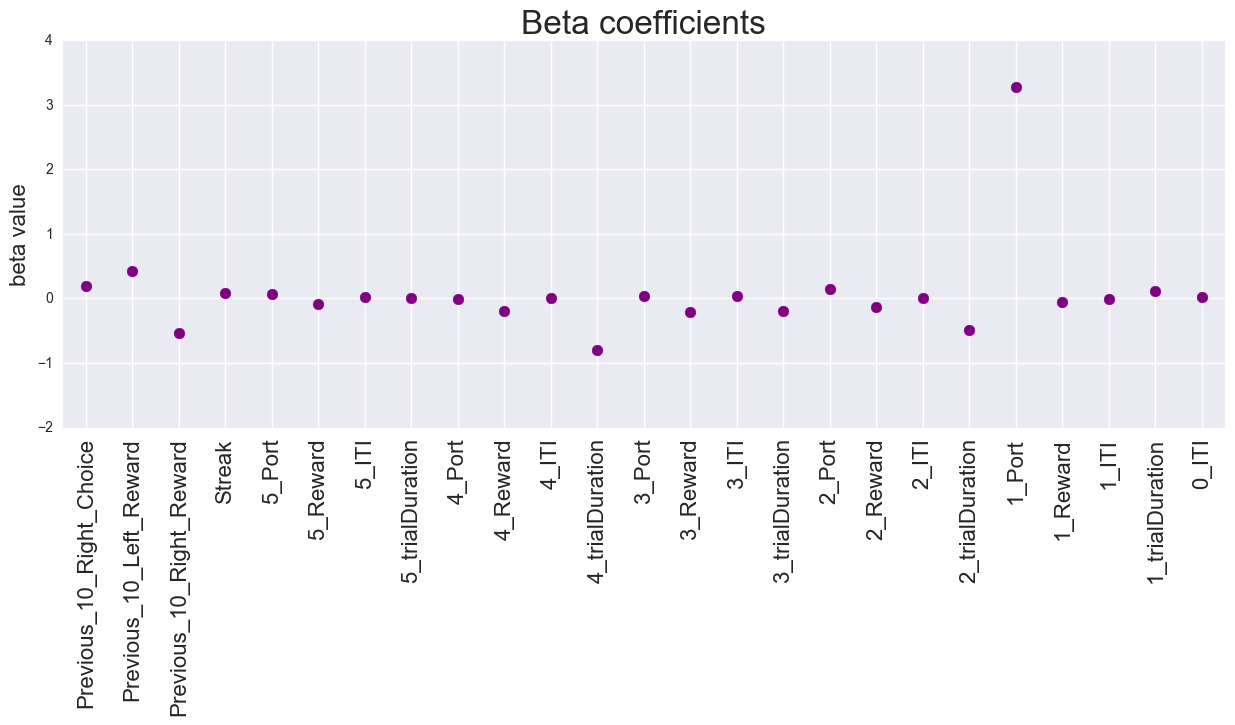

In [95]:
coefs = logreg.coef_
plt.figure(figsize=(15,5))
plt.scatter(np.arange(coefs[0].shape[0]),coefs[0],color='purple',s=60)
plt.xticks(np.arange(coefs[0].shape[0]),feature_names,rotation='vertical',fontsize=16)
plt.ylabel('beta value',fontsize=16)
plt.xlim(0.5,25.5)
plt.title('Beta coefficients',fontsize=24)

In [30]:
coef_frac = np.abs(coefs[0]) / np.sum(np.abs(coefs[0]))
coef_frac

array([  4.50656027e-02,   2.65072636e-02,   5.59773098e-02,
         7.11367297e-02,   1.00689000e-02,   8.96183821e-03,
         1.16247457e-02,   2.11125441e-03,   7.87313745e-04,
         2.30288456e-03,   2.58127529e-02,   2.59488621e-04,
         1.06935579e-01,   5.37348199e-03,   2.81841684e-02,
         5.07271907e-03,   2.69589998e-02,   2.03351388e-02,
         1.68101517e-02,   6.62748015e-05,   6.56314785e-02,
         4.37221450e-01,   7.93774131e-03,   3.96359359e-04,
         1.58189984e-02,   2.64137516e-03])

In [89]:
np.sum(np.abs(coefs[0]))

7.4985139028196066

In [35]:
from matplotlib import colors

In [148]:
a = plt.cm.get_cmap('Greens')
c = np.zeros_like(feature_names)
for i,f in enumerate(feature_names):
    c[i] = a(i*0.03846)

In [78]:
a(3)

(0.0045469999999999998, 0.003392, 0.030908999999999999, 1.0)

(-1.0011711847665448, 1.0, -1.0062557551015239, 1.0003047688745017)

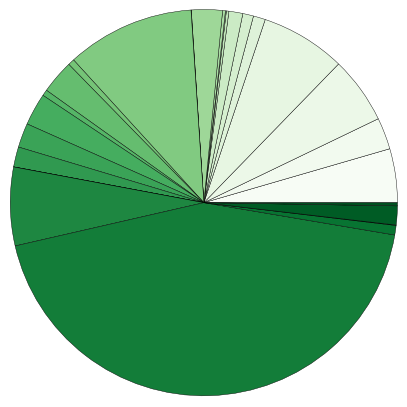

In [158]:
plt.figure(figsize=(5,5))
plt.pie(coef_frac,shadow=False,colors=c)
plt.axis('equal')

([<matplotlib.patches.Wedge at 0x115a3f860>,
  <matplotlib.text.Text at 0x115a4c978>])

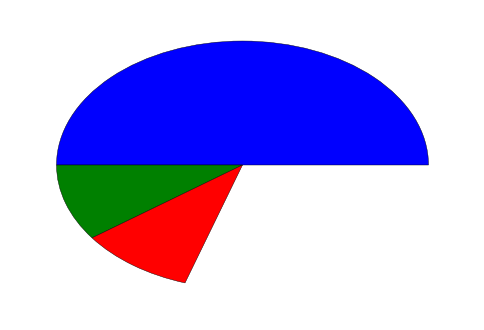

In [27]:
plt.pie([0.5,0.1,0.1])

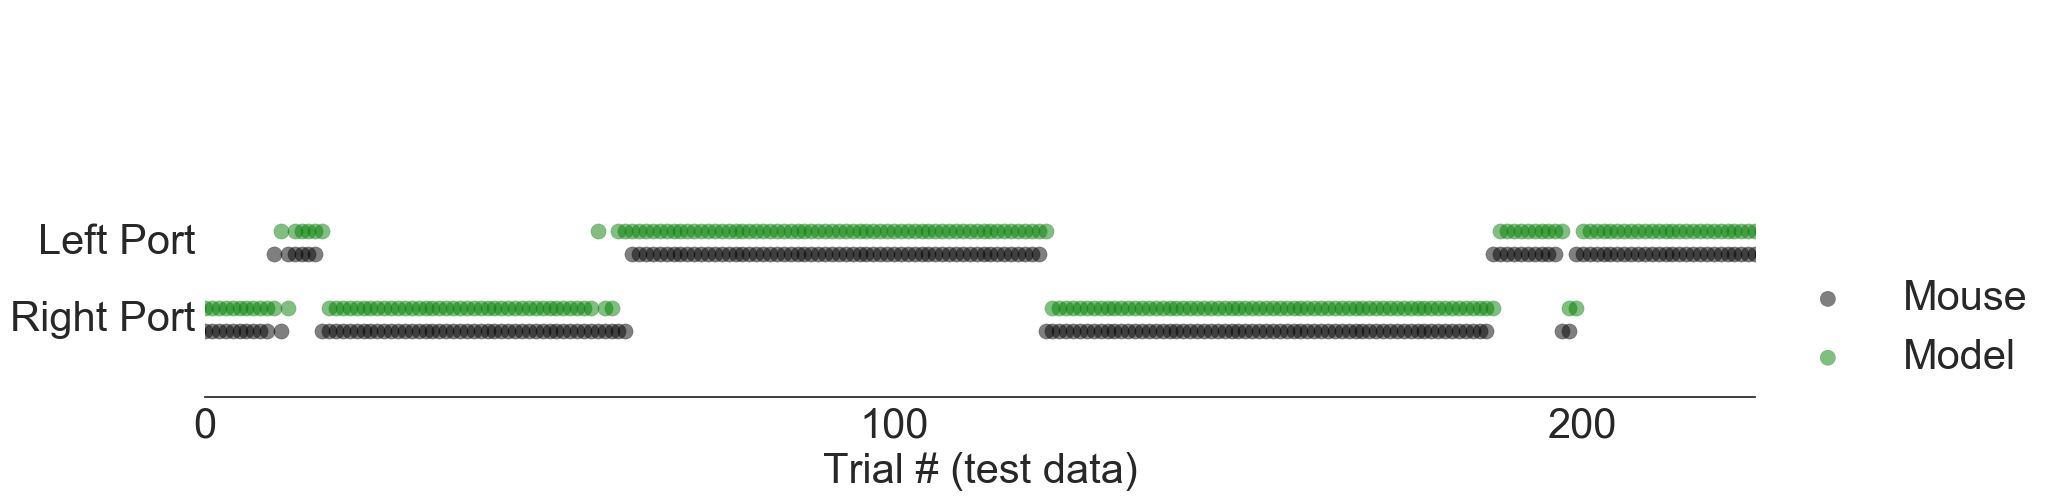

In [177]:
plt.figure(figsize=(20,5))
plt.scatter(np.arange(y_test.shape[0]),y_test/5 -0.03,color='black',label='Mouse',alpha=0.5,s=120)
plt.scatter(np.arange(y_test.shape[0]),y_predict/5 +0.03,color='green',label='Model',alpha=0.5,s=120)
sns.despine(left=True)
plt.yticks([0,0.2],['Right Port','Left Port'],fontsize=30)
plt.ylim(-0.2,0.8)
plt.xlim(175,400)
plt.xlabel('Trial # (test data)',fontsize=30)
plt.xticks([175,275,375],[0,100,200],fontsize=30)
plt.legend(bbox_to_anchor=(1.2,0.4),fontsize=30)

## Did the model get the switches right?

In [30]:
#calc true switches
y_test_switch = np.abs(np.diff(y_test))

#calc model switches
y_predict_switch = np.abs(np.diff(y_predict))

In [34]:
acc_pos,acc_neg,F1=sf.score_both_and_confuse(y_predict_switch,y_test_switch,confusion=False)

          Predicted NO  Predicted YES
True NO         1039.0           57.0
True YES          55.0           12.0

F1: 0.176

Accuracy on class 0: 0.95
Accuracy on class 1: 0.18



No. It didn't. 

# What about looking at left and right switches separately?

In [35]:
y_test_switchL = np.diff(y_test) == 1
y_test_switchR = np.diff(y_test) == -1

y_predict_switchL = np.diff(y_predict) == 1
y_predict_switchR = np.diff(y_predict) == -1

In [36]:
print('Right Switches: \n')
acc_pos,acc_neg,F1=sf.score_both_and_confuse(y_predict_switchR,y_test_switchR,confusion=False)

Right Switches: 

          Predicted NO  Predicted YES
True NO         1095.0           34.0
True YES          33.0            1.0

F1: 0.029

Accuracy on class 0: 0.97
Accuracy on class 1: 0.03



In [37]:
print('Left Switches: \n')
acc_pos,acc_neg,F1=sf.score_both_and_confuse(y_predict_switchL,y_test_switchL,confusion=False)

Left Switches: 

          Predicted NO  Predicted YES
True NO         1096.0           34.0
True YES          33.0            0.0

F1: 0.000

Accuracy on class 0: 0.97
Accuracy on class 1: 0.00



([<matplotlib.axis.YTick at 0x1288e3c50>,
 <a list of 3 Text yticklabel objects>)

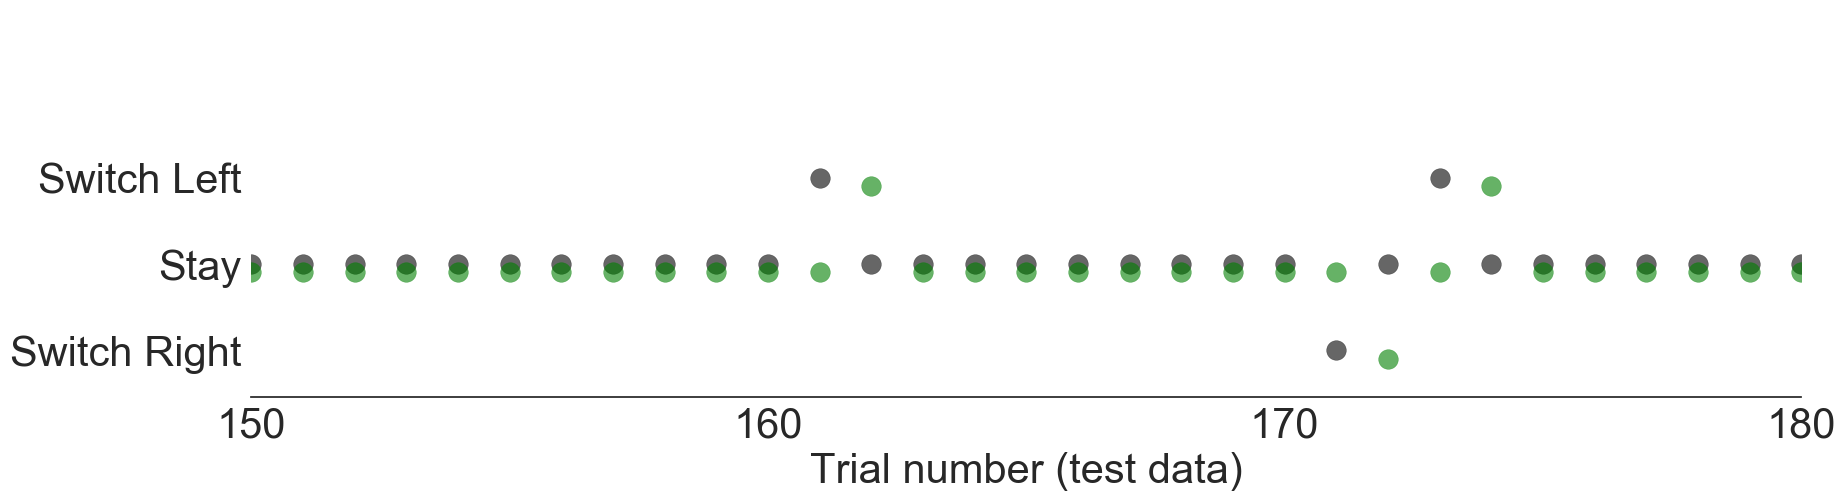

In [189]:
y_switch_true = np.diff(y_test)
y_switch_model = np.diff(y_predict)
sns.set_style('white')

plt.figure(figsize=(20,5))
plt.scatter(np.arange(y_switch_true.shape[0]),y_switch_true+0.05,color='black',label='true',alpha=0.6,s=200)
plt.scatter(np.arange(y_switch_model.shape[0]),y_switch_model-0.05,color='green',label='model',alpha=0.6,s=200)
sns.despine(left=True,bottom=False)
#plt.legend(loc='best',fontsize=30)
plt.xlim(350,380)
plt.xticks([350,360,370,380],[150,160,170,180],fontsize=30)
plt.ylim(-1.5,3)
plt.xlabel('Trial number (test data)',fontsize=30)
plt.yticks([-1,0,1],['Switch Right','Stay','Switch Left'],fontsize=30)

I think what may be happening here is that the model simply predicts the switch 1 trial after it already happens. It looks like its getting it all correct above - but look closely. The dots are slightly misaligned (in the x-axis). Let's zoom in:

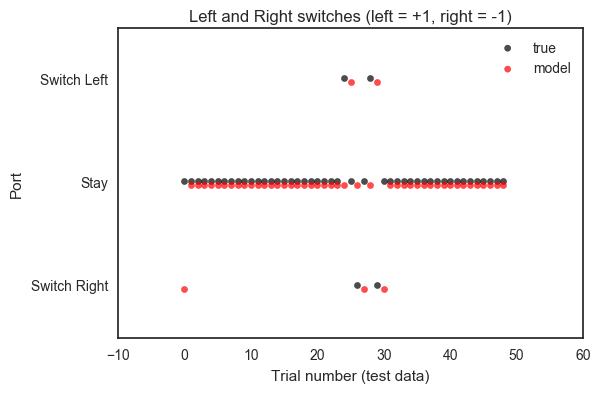

In [172]:
sns.set_style('white')
plt.scatter(np.arange(y_switch_true[1:50].shape[0]),y_switch_true[1:50]+0.02,color='black',label='true',alpha=0.7)
plt.scatter(np.arange(y_switch_model[1:50].shape[0]),y_switch_model[1:50]-0.02,color='red',label='model',alpha=0.7)
plt.legend(loc='best')
plt.title('Left and Right switches (left = +1, right = -1)')
plt.xlabel('Trial number (test data)')
plt.yticks([-1,0,1],['Switch Right','Stay','Switch Left'])
plt.ylabel('Port')

Right - now we can see that model is simply 'following' the mouse by 1 trial. 

Quick notes on the original version of this notebook (since erased) since we did this all a little hastily:

    1) summary data good enough to get ~95% accuracy which was comparable to using all features
    2) streak, ITI, trialDuration by themselves did not perform better than chance
    3) taking out trial -1 Port did not affect model even though it had highest beta coefficient
    4) only using past 5 trials good enough for 95% accuracy with trial -1,-2 port decisions the highest betas